# Preperations

Installs

In [18]:
installDep = False

if installDep:
	%pip install pandas
	%pip install numpy
	%pip install openpyxl
	%pip install matplotlib

Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Functions

In [20]:
def cleanupTable(tableData:pd.DataFrame, rowNamesNumber:int) -> pd.DataFrame:
	"""
	Cleans table and table head by:
	1. renames table columns considering the given row value
	2. drops missing  lines 
	3. replace n/e with 0
	4. converts str to numbers


	:param tableData the whole table which needs to be converted:
	:param rowNamesNumber int:
	:returns tableData:pd.Dataframe:
	"""

	colNames = tableData.columns
	for x in colNames:
		oldName = x
		newName = tableData[oldName][rowNamesNumber]
		tableData.rename(columns={oldName : newName}, inplace=True)
	tableData = tableData.dropna()
	tableData = tableData.reset_index(drop=True)
	tableData = tableData.replace('n/e', 0).infer_objects(copy=False)
	tableData = tableData.apply(pd.to_numeric, errors='coerce')

	return tableData

def generateHourlyData(dataSet: pd.Series) -> list:
	"""
	calculate the mean of every 4 rows and concat them into a new array
	@param dataSet
	@returns array
	"""
	hourlyData = []

	for x in range(0,(len(dataSet)-3), 4):

		sumHour = 0
		
		for y in range(0,4):
			position = x+y
			sumHour = sumHour + int(dataSet.iloc[position])

		avgHour = sumHour / 4
		hourlyData.append(avgHour)

	return hourlyData

def getProfile(generationValues:pd.Series, capacity:int) -> list:
	"""
	generate a profile from a series by dividing its absolute values by its maximum value  
	"""
	loadProfile = []

	for x in range(0, len(generationValues)):
		loadProfile.append(round(generationValues[x] / capacity, 4))

	return loadProfile

# generate renewable profiles


### prepare data

get the data

In [21]:
generation = pd.read_excel('./originData/Actual Generation per Production Type.xlsx')
capacities = pd.read_excel('./originData/Installed Capacity per Production Type.xlsx')
generation = cleanupTable(generation, 3)

solarData = generation['Solar']
windOffshoreData = generation['Wind Offshore']
windOnshoreData = generation['Wind Onshore']
windSumData = windOffshoreData + windOnshoreData
renewableData = windOffshoreData + windOnshoreData + solarData
riverData = generation['Hydro Run-of-river and poundage']
waterResData = generation['Hydro Water Reservoir']
pumpStorageData = generation['Hydro Pumped Storage']


C:\Users\sebas\AppData\Local\Temp\ipykernel_25828\1875974086.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tableData = tableData.replace('n/e', 0).infer_objects(copy=False)


### generate data

In [22]:
solarData = generateHourlyData(solarData)
windOffshoreData = generateHourlyData(windOffshoreData)
windOnshoreData = generateHourlyData(windOnshoreData)
windSumData = generateHourlyData(windSumData)
renewableData = generateHourlyData(renewableData)
riverData = generateHourlyData(riverData)
waterResData = generateHourlyData(waterResData)
pumpStorageData = generateHourlyData(pumpStorageData)

calculate profiles from hourly data

In [23]:

solarCap = 63066
windOffCap = 8129
windOnCap = 57590
riverCap = 3715
waterResCap = 1334
pumpedStorageCap = 9379

solarProfile = getProfile(solarData, solarCap)
windOffProfile = getProfile(windOffshoreData, windOffCap)
windOnProfile = getProfile(windOnshoreData, windOnCap)
windSumProfile = getProfile(windSumData, (windOnCap + windOffCap))
renewableProfile = getProfile(renewableData, (windOnCap + windOffCap + solarCap))
riverProfile = getProfile(riverData, riverCap)
waterResProfile = getProfile(waterResData, waterResCap)
pumpedStorageProfile = getProfile(pumpStorageData, pumpedStorageCap)


save the data

In [24]:
solarProfile = pd.DataFrame(data=solarProfile)
windOffProfile = pd.DataFrame(data=windOffProfile)
windOnProfile = pd.DataFrame(data=windOnProfile)
windSumProfile = pd.DataFrame(data=windSumProfile)
renewableProfile = pd.DataFrame(data=renewableProfile)
riverProfile = pd.DataFrame(data = riverProfile)
waterResProfile = pd.DataFrame(data = waterResProfile)
pumpedStorageProfile = pd.DataFrame(data = pumpedStorageProfile)

solarProfile.columns= ['solar - hourly profile']
windOffProfile.columns= ['windOff - hourly profile']
windOnProfile.columns= ['windOn - hourly profile']
windSumProfile.columns= ['windSum - hourly profile']
renewableProfile.columns = ['renewable - hourly profile']
riverProfile.columns= ['river - hourly profile']
waterResProfile.columns= ['waterRes - hourly profile']
pumpedStorageProfile.columns= ['pumpedStorage - hourly profile']


solarProfile.to_excel('./data/solarProfile_hour.xlsx')
windOffProfile.to_excel('./data/windOffProfile_hour.xlsx')
windOnProfile.to_excel('./data/windOnProfile_hour.xlsx')
windSumProfile.to_excel('./data/windSumProfile_hour.xlsx')
renewableProfile.to_excel('./data/renewableProfile_hour.xlsx')
riverProfile.to_excel('./data/riverProfile_hour.xlsx')
waterResProfile.to_excel('./data/waterResProfile_hour.xlsx')
pumpedStorageProfile.to_excel('./data/pumpedStorageProfile_hour.xlsx')

solarData = pd.DataFrame(data=solarData)
windOffshoreData = pd.DataFrame(data=windOffshoreData)
windOnshoreData = pd.DataFrame(data=windOnshoreData)
windSumData = pd.DataFrame(data=windSumData)
renewableData = pd.DataFrame(data=renewableData)
riverData = pd.DataFrame(data=riverData)
waterResData = pd.DataFrame(data=waterResData)
pumpStorageData = pd.DataFrame(data=pumpStorageData)

solarData.to_excel('./data/solarData_hour.xlsx')
windOffshoreData.to_excel('./data/windOffshoreData_hour.xlsx')
windOnshoreData.to_excel('./data/windOnshoreData_hour.xlsx')
windSumData.to_excel('./data/windSumData_hour.xlsx')
renewableData.to_excel('./data/renewableData_hour.xlsx')
riverData.to_excel('./data/riverData_hour.xlsx')
waterResData.to_excel('./data/waterResData_hour.xlsx')
pumpStorageData.to_excel('./data/pumpStorageData_hour.xlsx')

allData = pd.DataFrame()

wasteProfile = np.full(8760, 1)

allData['solar - profile'] = solarProfile
allData['windOff - profile'] = windOffProfile
allData['windOn - profile'] = windOnProfile
allData['windSum - profile'] = windSumProfile
allData['renewable - profile'] = renewableProfile
allData['river - profile'] = riverProfile
allData['waterRes - profile'] = waterResProfile
allData['pumpStorage - profile'] = pumpedStorageProfile


allData['solar - absolute value'] = solarData 
allData['windOffshore - absolute value'] = windOffshoreData 
allData['windOnshore - absolute value'] = windOnshoreData 
allData['windSum - absolute value'] = windSumData 
allData['renewable - absolute value'] = renewableData 
allData['river - absolute value'] = riverData 
allData['waterRes - absolute value'] = waterResData 
allData['pumpStorage - absolute value'] = pumpStorageData 


allData.to_excel('./data/renewProfiles.xlsx')

# cleanup demand load data


In [25]:
originData = pd.read_excel('./originData/Total Load - Day Ahead _ Actual.xlsx') 

originData = cleanupTable(originData, 5)
originData.to_excel('./data/loadData2023_15min.xlsx')

loadHourly = generateHourlyData(originData['Actual Total Load'])
pdHourData = pd.DataFrame(data = loadHourly)
pdHourData.to_excel('./data/loadData2023_hour.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: './originData/Total Load - Day Ahead _ Actual.xlsx'

show data

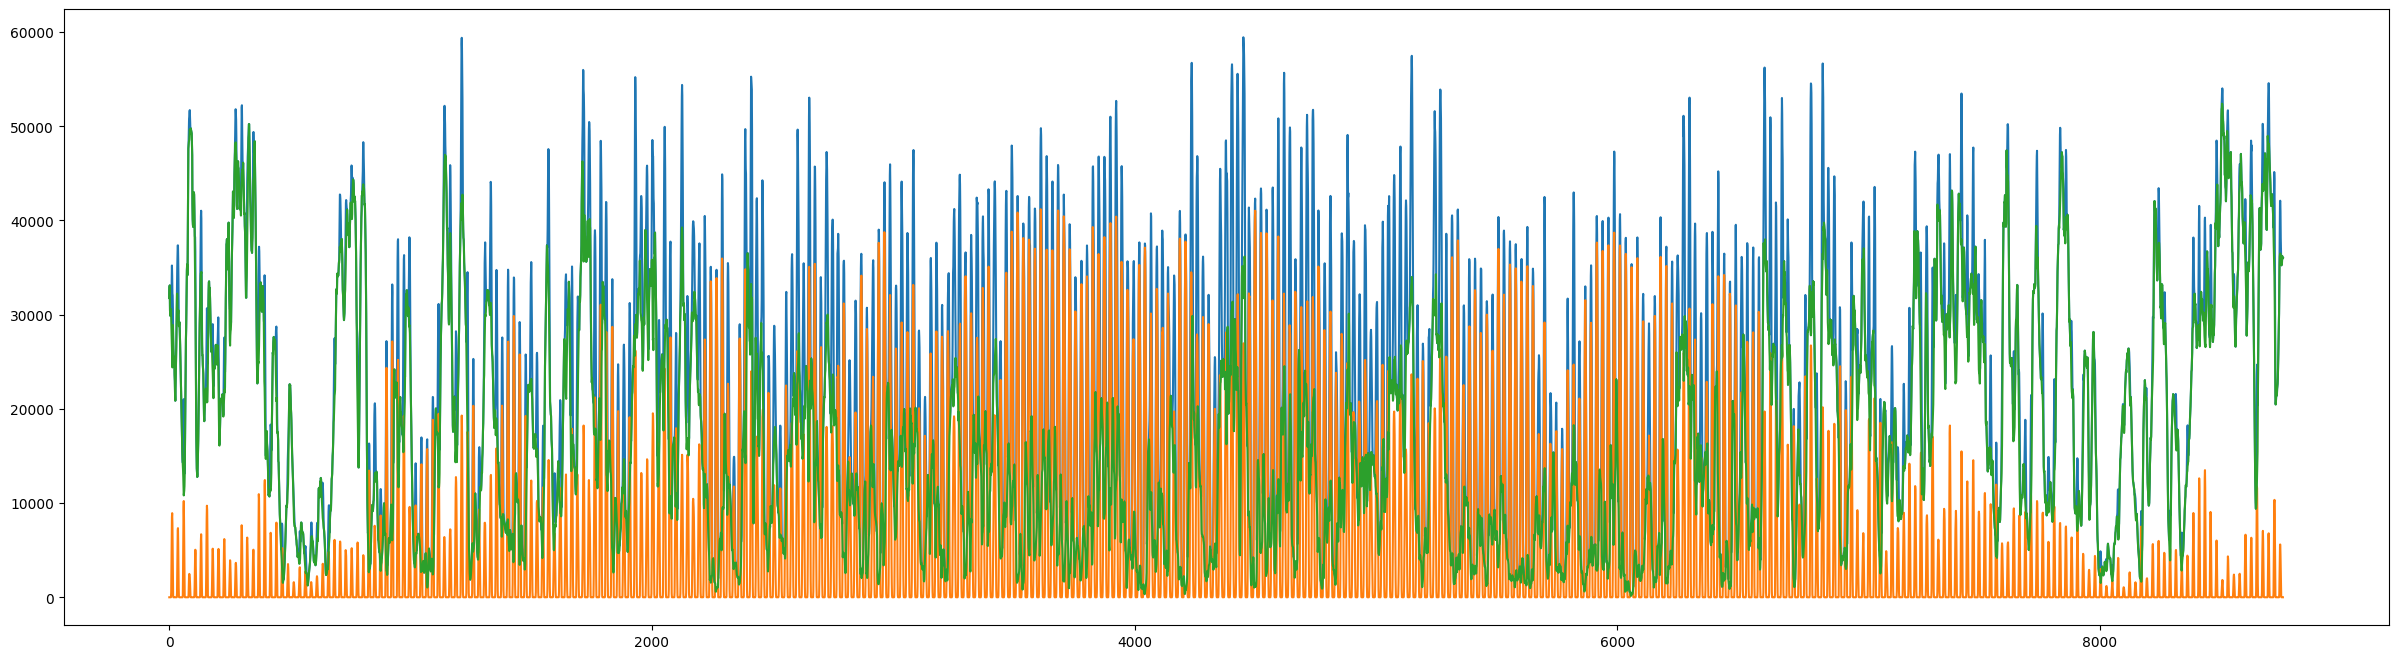

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(windSumData[0]+solarData[0])
plt.plot(solarData[0])
plt.plot(windSumData[0])

plt.show()

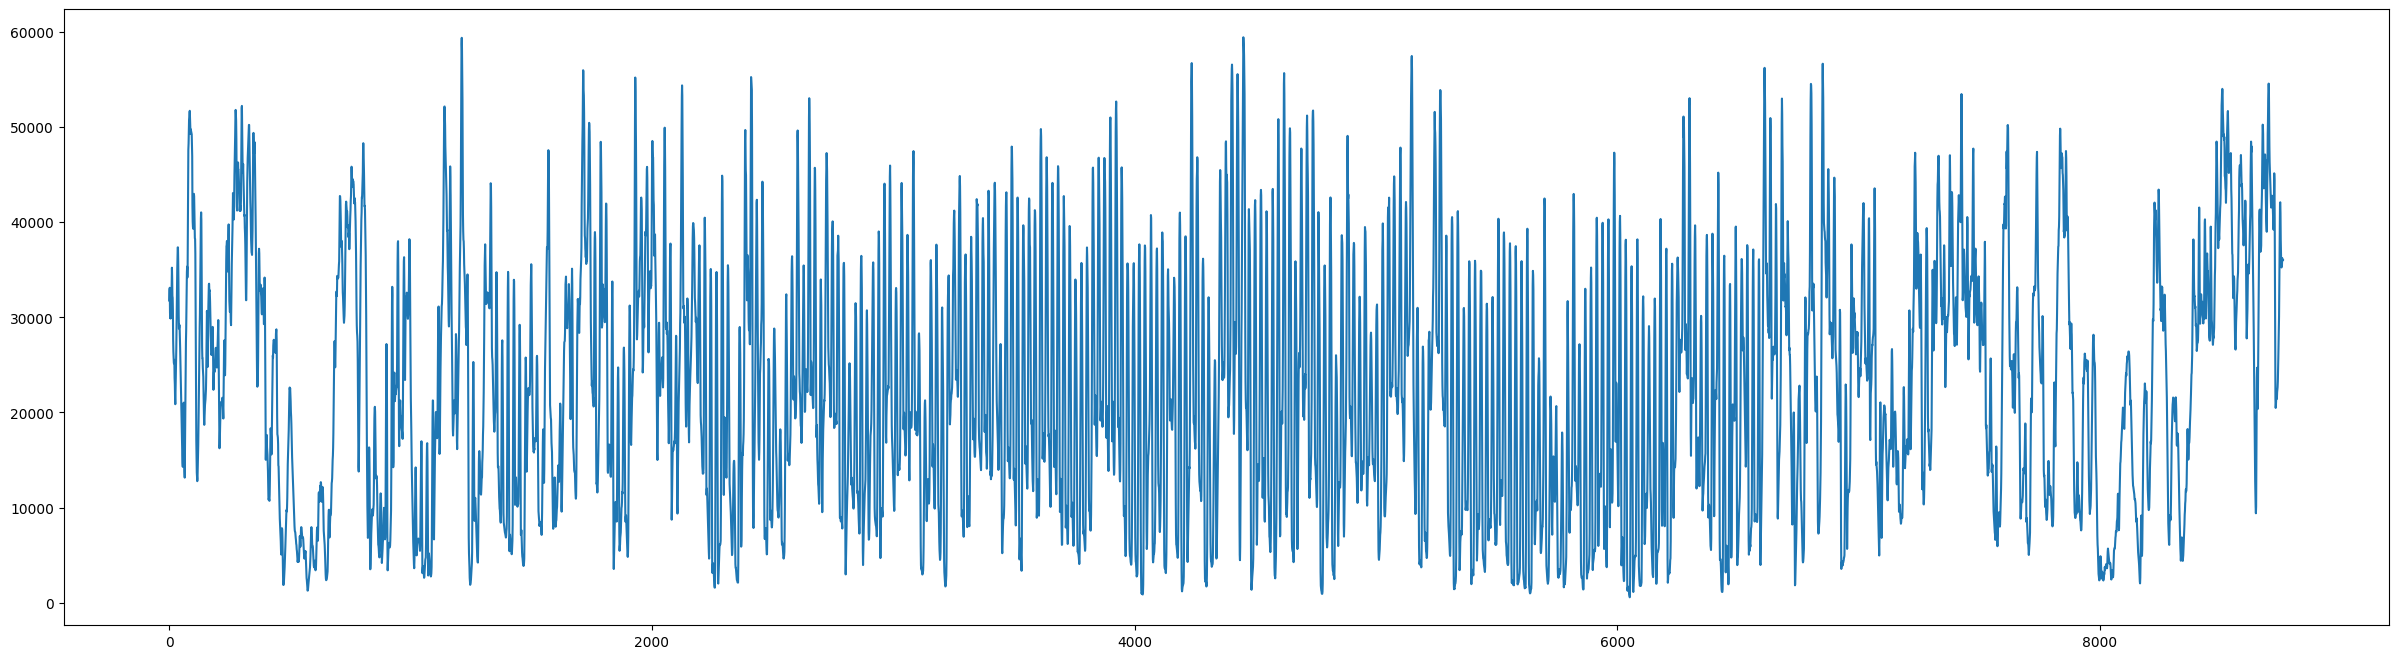

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(windSumData[0]+solarData[0])


plt.show()

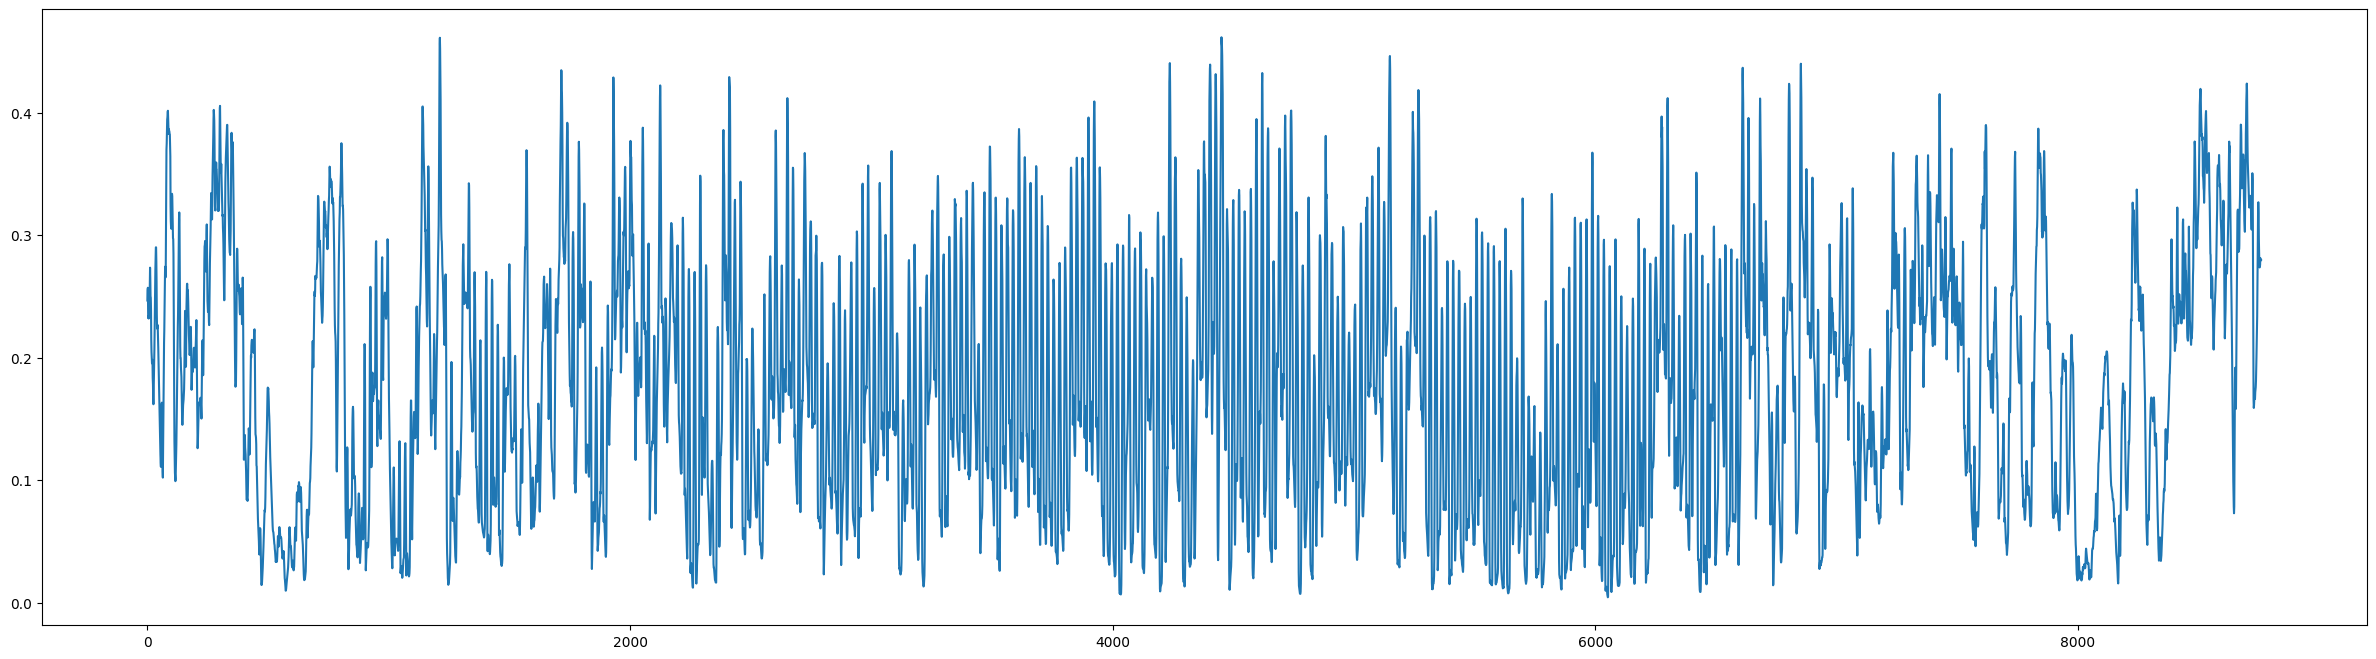

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(renewableProfile['renewable - hourly profile'])


plt.show()

# compare generation of renewables with total load

load demand data

In [ ]:
totalLoad = pd.read_excel('./data/demand.xlsx')['s1']
negCapPrices = pd.read_excel('./data/negCapacityData.xlsx')
posCapPrices = pd.read_excel('./data/posCapacityData.xlsx')
negEnPrices = pd.read_excel('./data/negEnergyData.xlsx')
posEnPrices = pd.read_excel('./data/posEnergyData.xlsx')


calculate renewable part of total supply

In [ ]:
renewablePart = renewableData[0] / totalLoad

In [ ]:
posEnPricesMax =posEnPrices['GERMANY_AVERAGE_ENERGY_PRICE_[EUR/MWh]'].max
negEnPricesMax =negEnPrices['GERMANY_AVERAGE_ENERGY_PRICE_[EUR/MWh]'].max
posCapPricesMax =posCapPrices['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'].max
negCapPricesMax =negCapPrices['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'].max


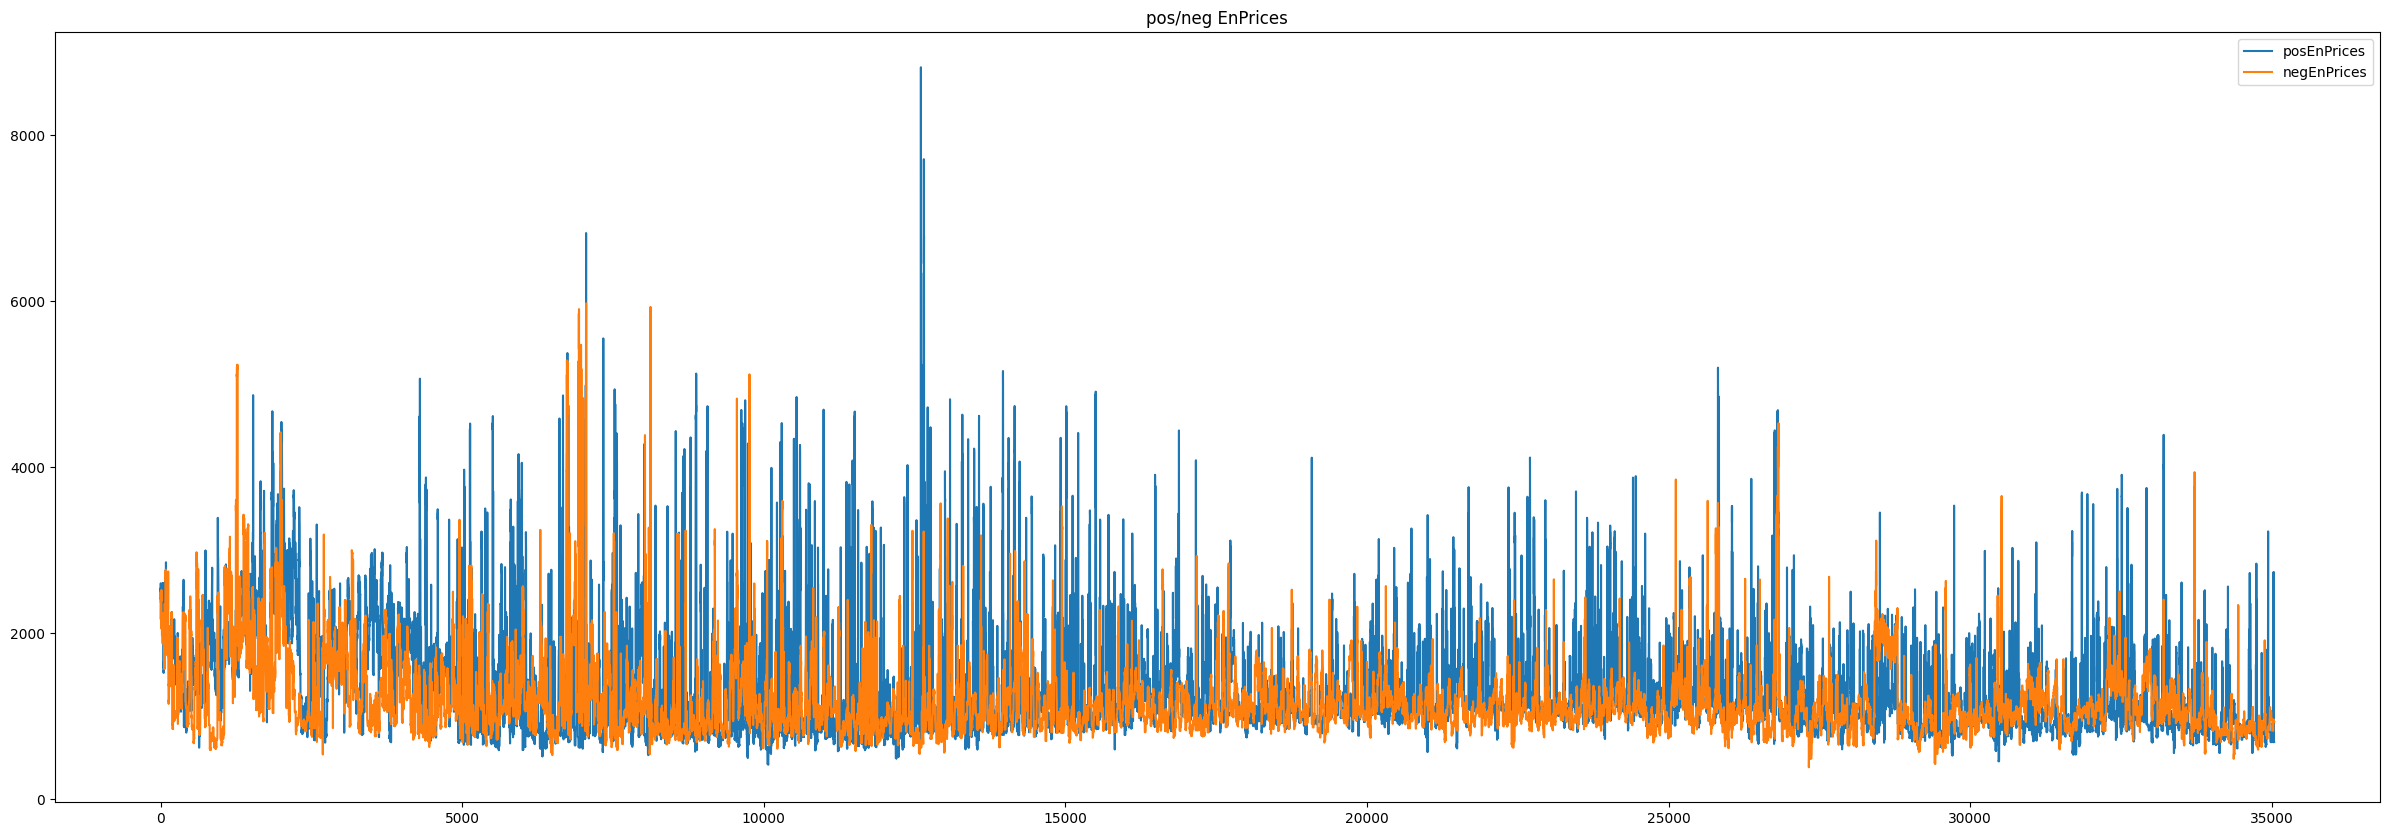

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(posEnPrices['GERMANY_AVERAGE_ENERGY_PRICE_[EUR/MWh]'], label='posEnPrices')
plt.plot(-negEnPrices['GERMANY_AVERAGE_ENERGY_PRICE_[EUR/MWh]'], label='negEnPrices')
plt.legend()
plt.title('pos/neg EnPrices')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

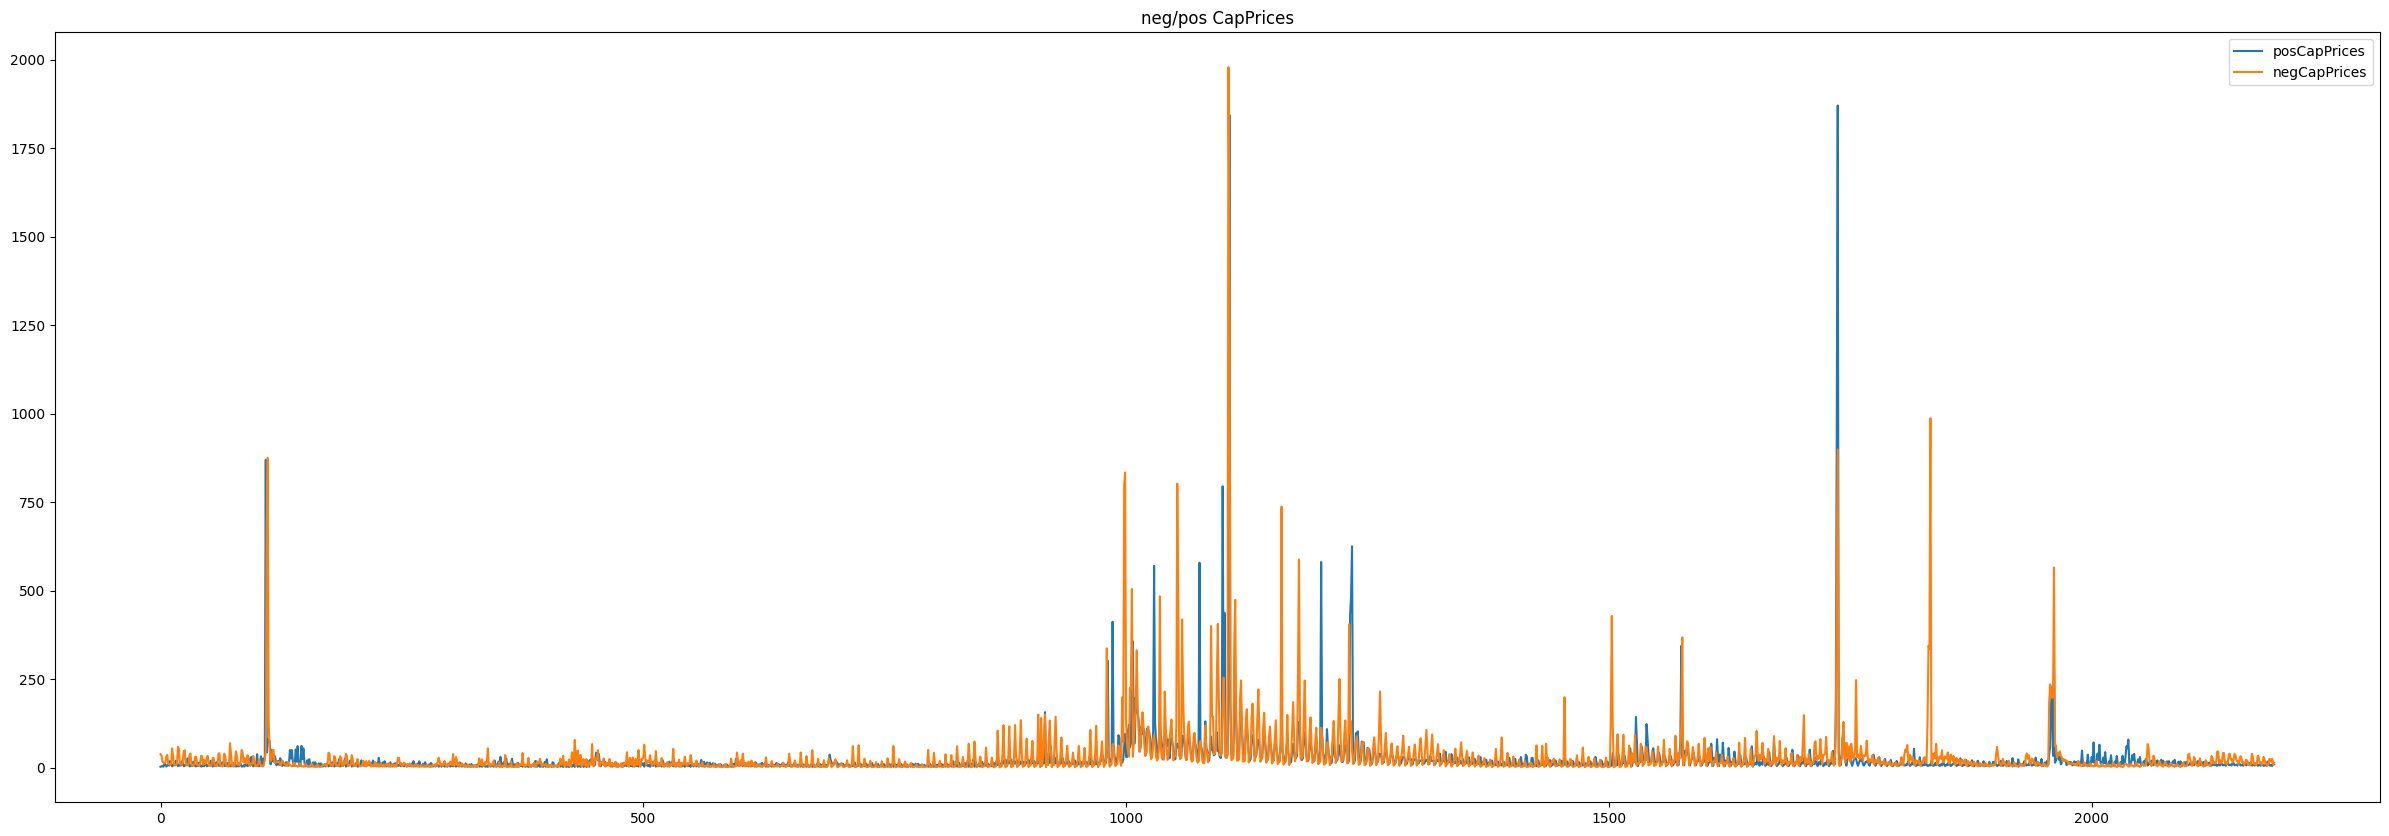

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(posCapPrices['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'], label='posCapPrices')
plt.plot(negCapPrices['TOTAL_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'], label='negCapPrices')
plt.legend()
plt.title('neg/pos CapPrices')
plt.show

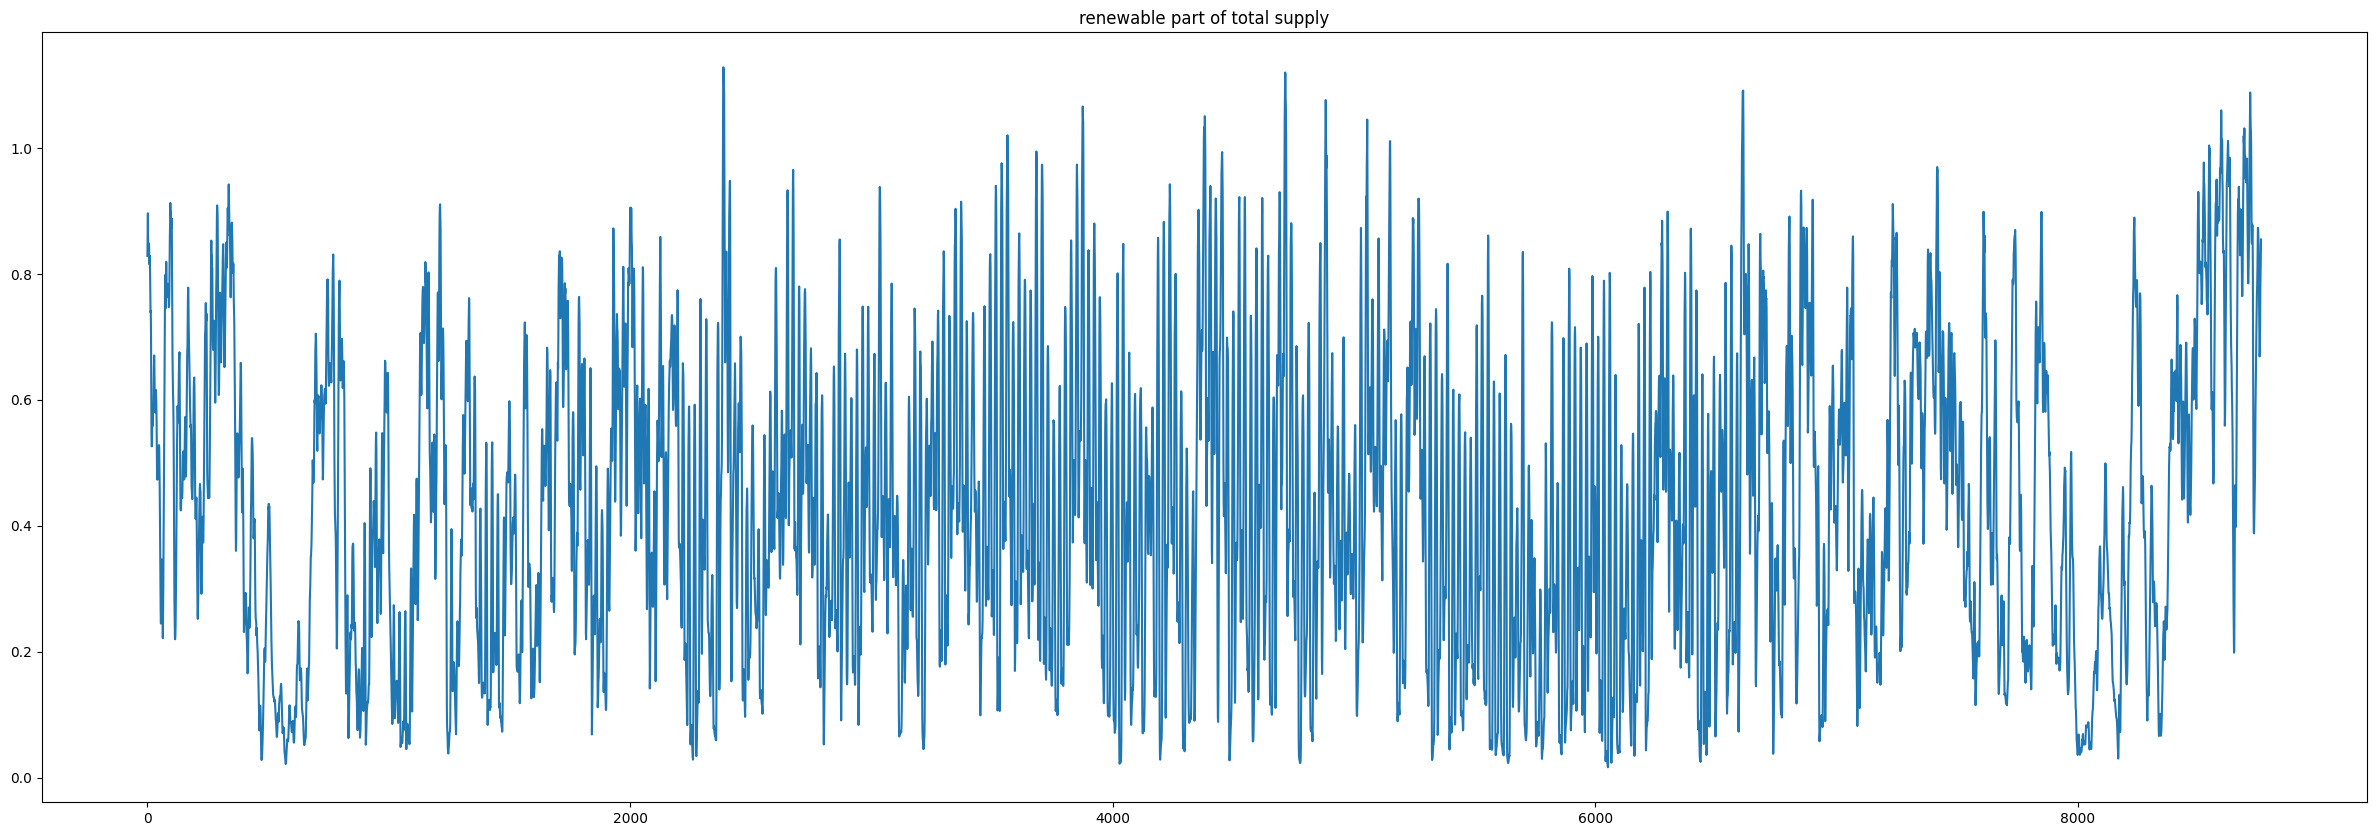

In [ ]:
plt.figure(figsize=(30,10))
plt.title('renewable part of total supply')
plt.plot(renewablePart)
plt.show()


In [29]:
forecastNegCap = pd.read_excel('./data/final_negCap2023.xlsx')['0.5']
forecastPosCap = pd.read_excel('./data/final_posCap2023.xlsx')['0.5']

In [31]:
originNegCapData = pd.read_excel('./data/negCapacityData.xlsx')
originPosCapData = pd.read_excel('./data/posCapacityData.xlsx')

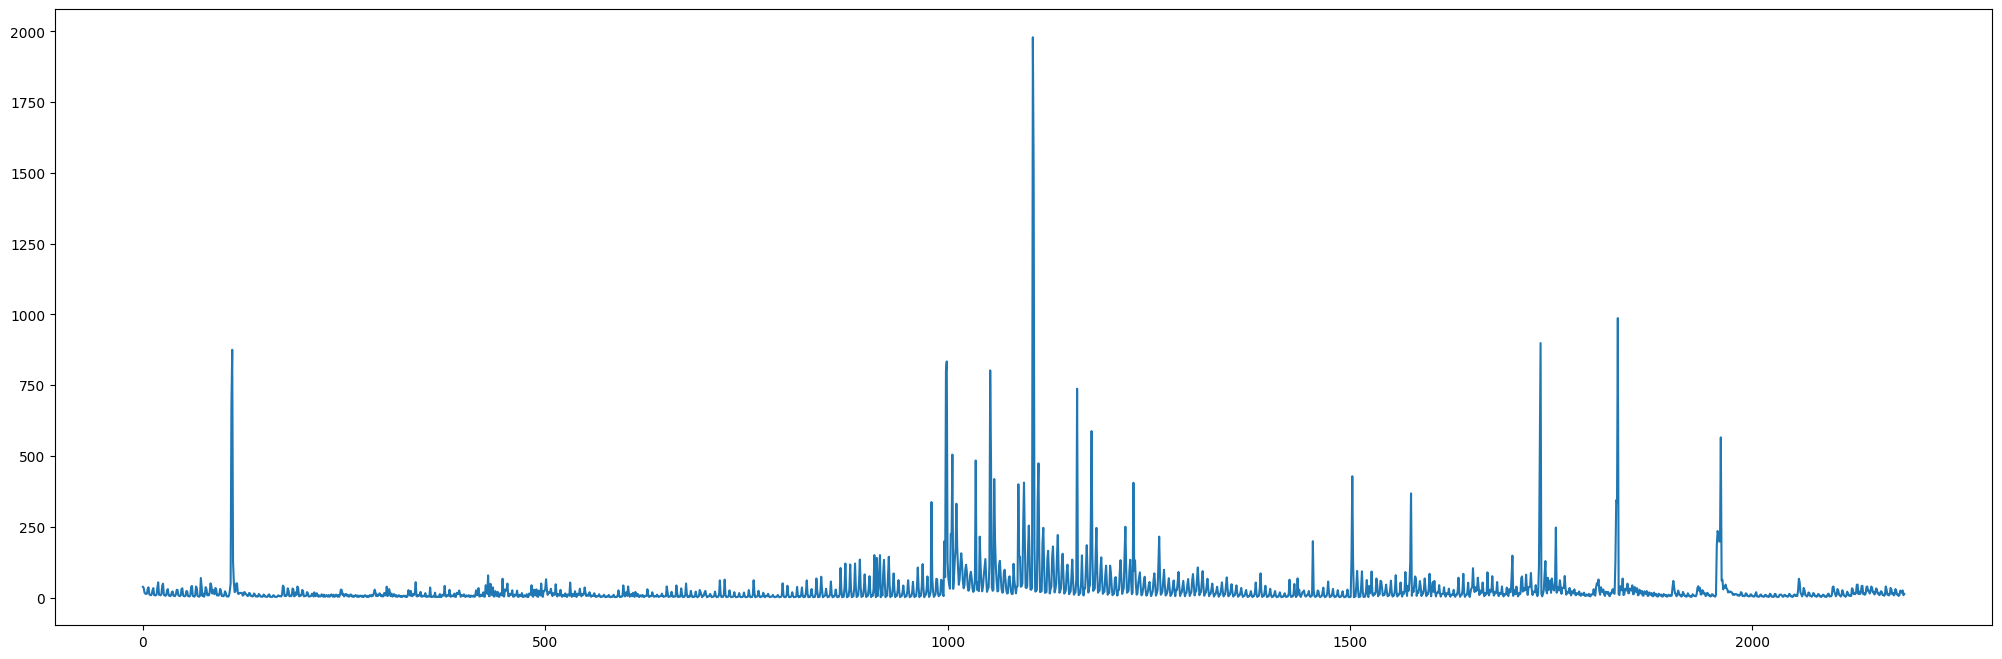

In [33]:
plt.figure(figsize=(25,8))
plt.plot(originNegCapData['GERMANY_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'])


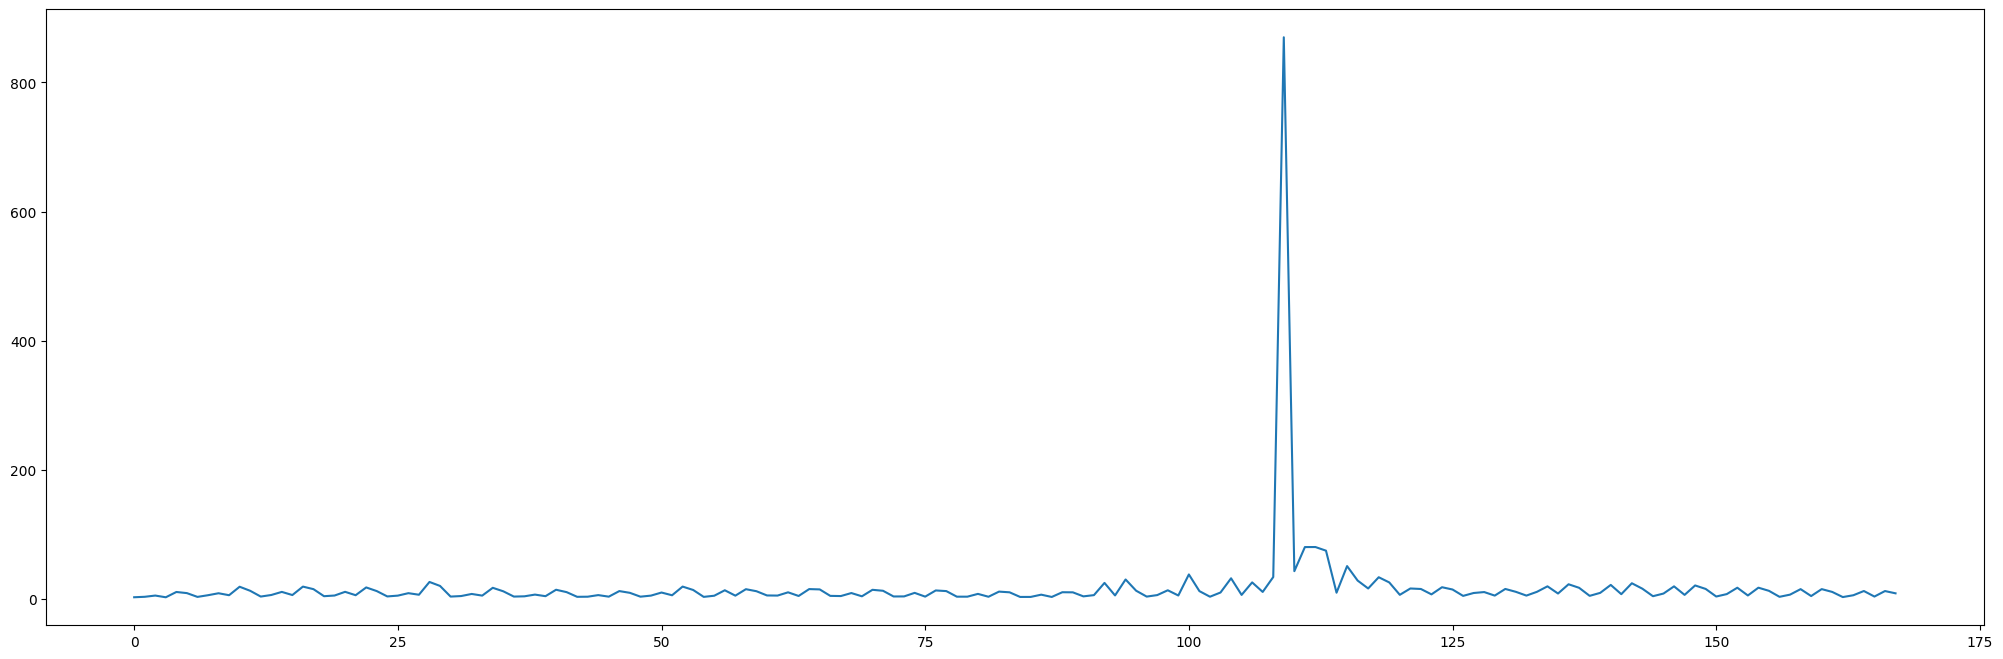

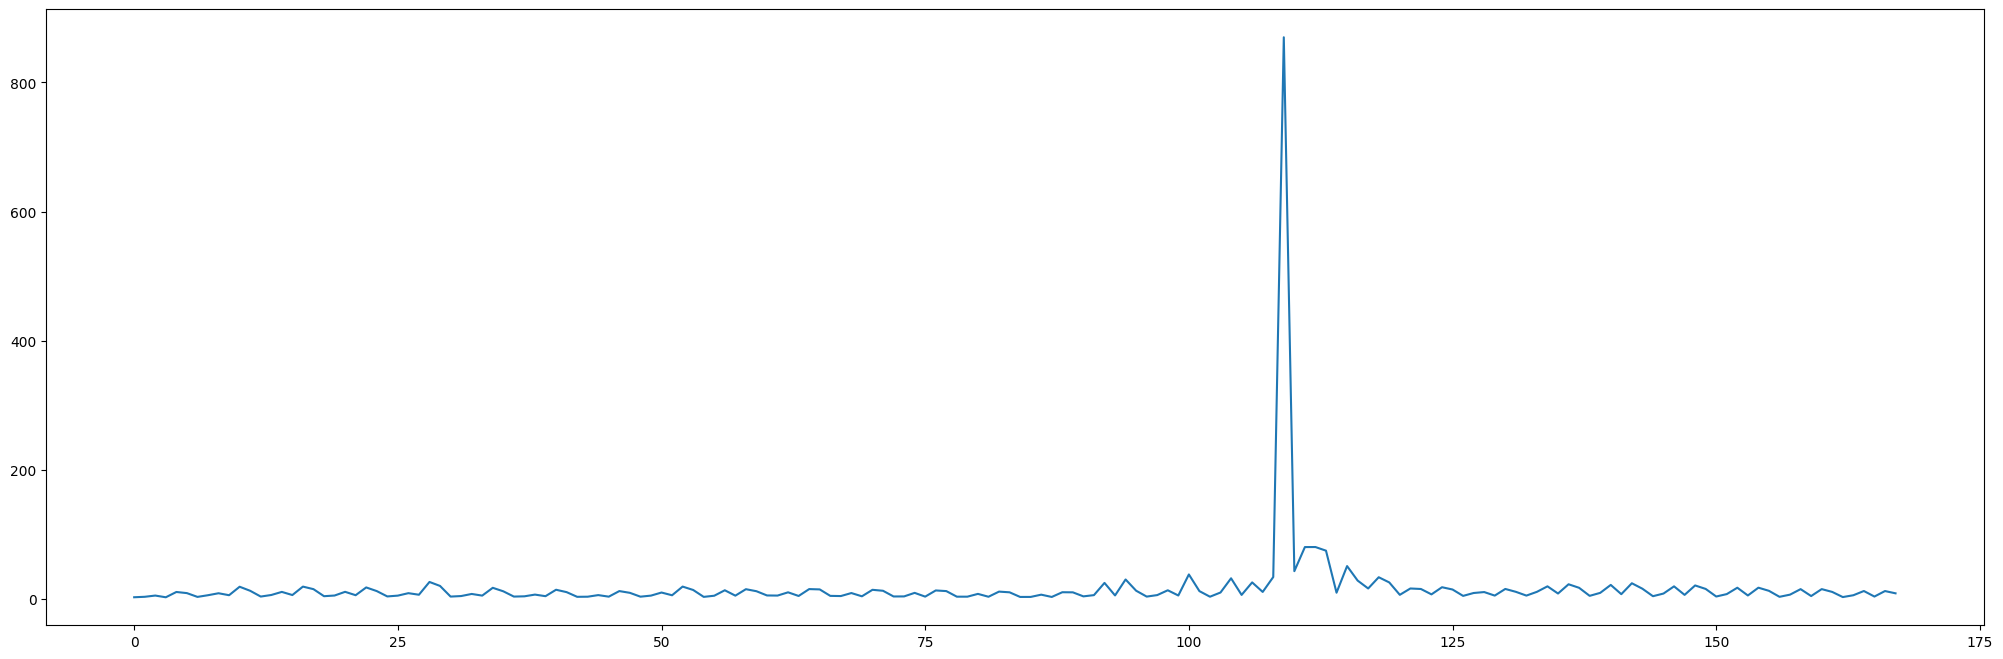

In [ ]:
plt.figure(figsize=(25,8))
plt.plot(originPosCapData['GERMANY_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'])
plt.show()
plt.figure(figsize=(25,8))
plt.plot(originPosCapData['GERMANY_MARGINAL_CAPACITY_PRICE_[(EUR/MW)/h]'][0:96])
plt.show()

In [ ]:
def evaluateForecast(forecast, origin):
	
